<a href="https://colab.research.google.com/github/elinneaeriksson/Applied_AI_Project/blob/main/Project_AppliedAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load training data

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# The path of the dataset

df=pd.read_csv('gdrive/My Drive/Project Applied AI/Data/training_dataset.csv',sep=';')
#Print data
df.head()

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0


In [ ]:
df.describe()

,DP_ID,Date,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
count,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921905e+06
mean,2.391436e+03,2.021091e+07,4.298932e+02,8.557945e+01,2.819306e+01,1.384524e+01,6.669162e+00,2.002764e+01,1.236552e+01
std,1.891637e+03,2.010941e+02,1.017515e+02,2.035077e+01,6.780857e+00,3.384322e+00,1.678570e+00,3.027135e+00,8.023255e+00
min,1.530000e+02,2.021060e+07,2.400000e+02,4.800000e+01,1.600000e+01,8.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00
25%,5.430000e+02,2.021072e+07,3.450000e+02,6.900000e+01,2.300000e+01,1.100000e+01,5.000000e+00,1.809000e+01,5.000000e+00
50%,1.254000e+03,2.021092e+07,4.330000e+02,8.600000e+01,2.800000e+01,1.400000e+01,7.000000e+00,1.985000e+01,1.200000e+01
75%,4.437000e+03,2.021111e+07,5.180000e+02,1.030000e+02,3.400000e+01,1.700000e+01,8.000000e+00,2.194000e+01,1.900000e+01
max,4.873000e+03,2.021123e+07,6.000000e+02,1.200000e+02,4.000000e+01,2.000000e+01,1.000000e+01,4.583000e+01,4.500000e+01


In [ ]:
#combine date and time and add a column to use on x-axis
import datetime
df['datetime'] = pd.to_datetime(df['Date'].astype(str)+ ' ' + df['Time'], format='%Y%m%d %H:%M:%S')
df.head()

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,datetime
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0,2021-06-01 04:00:00
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0,2021-06-01 04:00:00
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0,2021-06-01 04:00:00
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0,2021-06-01 04:00:00
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0,2021-06-01 04:00:00


In [ ]:
df_E4S56780= df[df['PORTAL']=='E4S 56,780']

count    272954.000000
mean         12.367560
std           7.835594
min           1.000000
25%           5.000000
50%          13.000000
75%          19.000000
max          38.000000
Name: FLOW, dtype: float64
count    272954.000000
mean         18.386345
std           2.322028
min           1.400000
25%          16.940000
50%          18.330000
75%          19.880000
max          35.830000
Name: SPEED_MS_AVG, dtype: float64


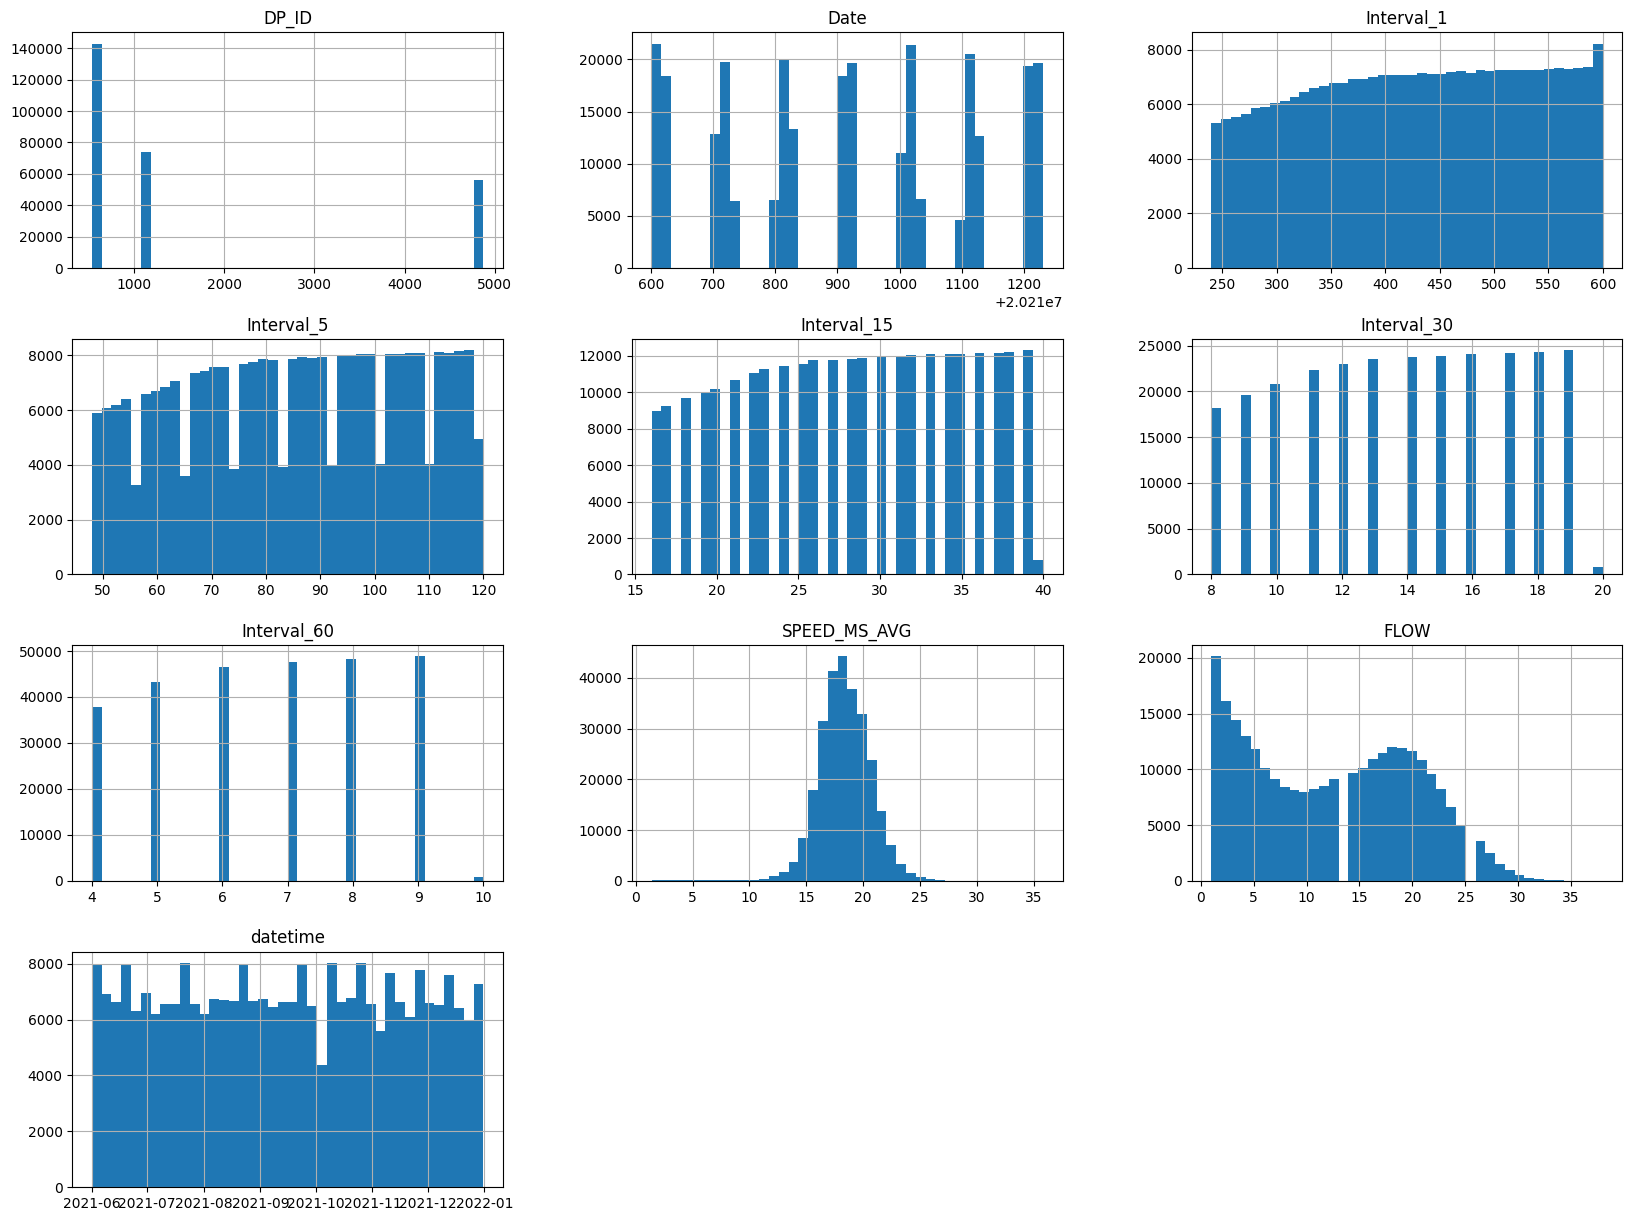

In [ ]:
#Create histogram for portal E4S 56,780
df_E4S56780.hist(bins=40,figsize=(20,15))

print(df_E4S56780['FLOW'].describe())
print(df_E4S56780['SPEED_MS_AVG'].describe())

[ 543  534 4872 1079]


<Axes: xlabel='FLOW', ylabel='SPEED_MS_AVG'>

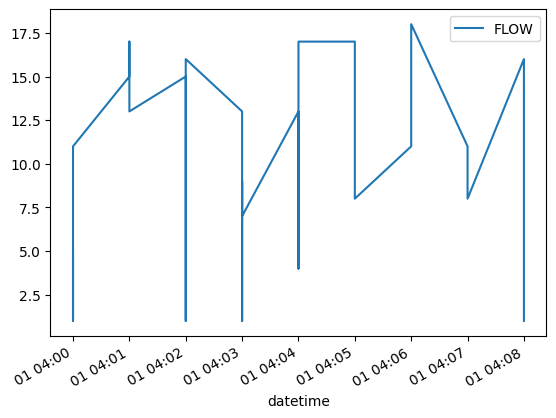

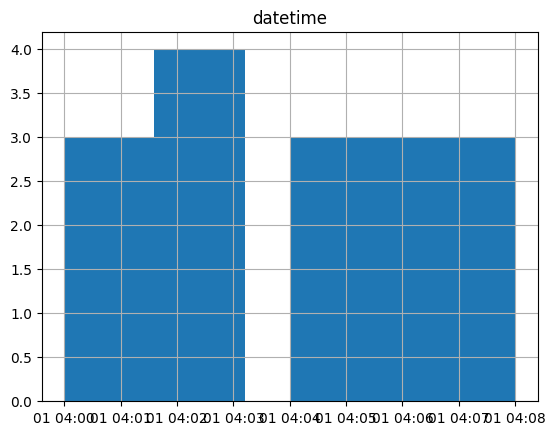

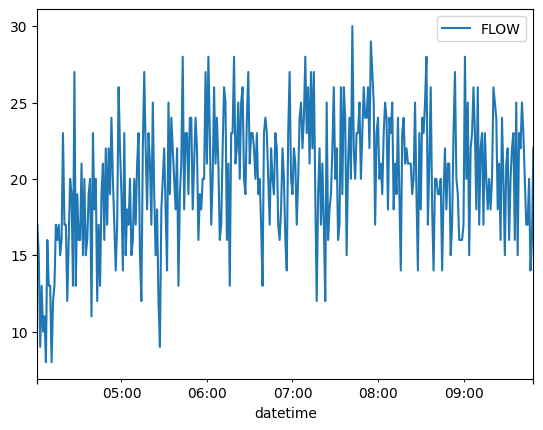

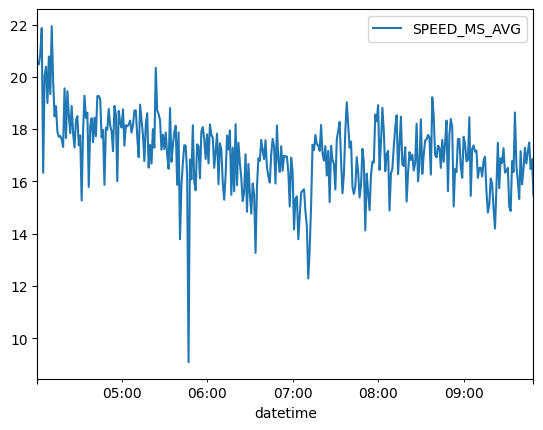

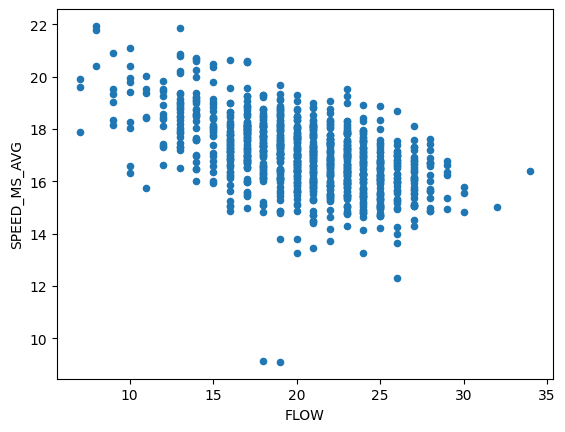

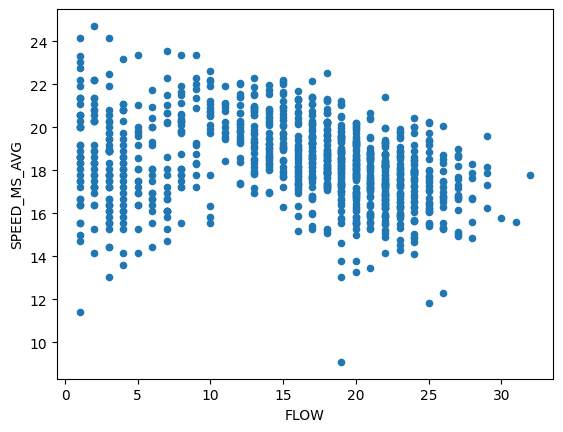

In [ ]:
df_E4S56780.iloc[1:30,:].plot(x='datetime',y='FLOW') #den här  konstig ut pga är ju flera sensorer från samma portal som mäter samtidigt?
df_E4S56780.iloc[1:30,:].hist('datetime') #det kan man se i histogrammet
print(df_E4S56780['DP_ID'].unique()) #de här sensorerna finns i den här portalen

#tittar på en sensor som exempel.
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:350,:].plot(x='datetime',y='FLOW') #mycket bättre
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:350,:].plot(x='datetime',y='SPEED_MS_AVG')

#scatterplot
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:1000,:].plot.scatter(x='FLOW',y='SPEED_MS_AVG')

df_E4S56780.iloc[1:1000,:].plot.scatter(x='FLOW',y='SPEED_MS_AVG')